<a href="https://colab.research.google.com/github/Deniandel/Sentiment-on-AI/blob/main/Copy_of_MAS4115_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To import the CSV file
from google.colab import files
uploaded = files.upload()

Saving file.csv to file.csv


Code Explanation:


*   Vader Lexicon is a powerful device to view the valence scores of each word in the lexicon according to the rules, and then is noramlized between -1 for being the most negative and +1 for being the most extreme positive.


*   On the github repo which I have linked in my document, positive sentiment is anything with a score of 0.05 and up, neutral is -0.05 to 0.05, and negative is -0.05 and lower


*   Upon looking at the csv file I uploaded, at initial glance it would seem that almost all of the results of tweets are negative. However, running it through NLTK algorithim shows a different story.



*   As you can see in my 2 graphs of NLTK, I analyzed the tweet lengths which were centered around 10-20 words in length, and using the sentiment scoring from NLTK I imported it actually shows, through going each tweet line by line, that most of the verbage in them are neutral in style and not negative as the uploader of the CSV file would like to suggest.

*   The PCA of the data needed to be put into an array to be properly displayed on the subsequent graph. As shown in the clusters it seems as though the length of the tweets and the sentiment of the tweets, are clustered together in many different variances. This means that despite the different sentiments, most people's tweets, regardless of how they feel towards AI, usually cluster around the same number of words.


*   The SVD shows the overall structure of the tweets from the CSV file. As you can see in the graph, despite there being different sentiments, the data is all randomly scattered across the graph with most if it ranging from 2 to -2 on the y-axis. This shows that the sentiment score is unreleated to the length for the most part as they all seem to be structured the same according to this analysis














[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


First few rows of the dataframe:
   Unnamed: 0                                             tweets   labels
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1           1  Try talking with ChatGPT, our new AI system wh...     good
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3           3  THRILLED to share that ChatGPT, our new model ...     good
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad

Sentiment Distribution:
labels
bad        49.155928
good       25.541510
neutral    25.302562
Name: proportion, dtype: float64


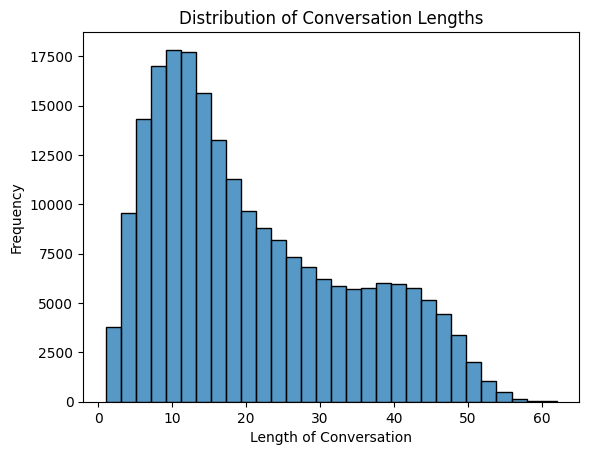

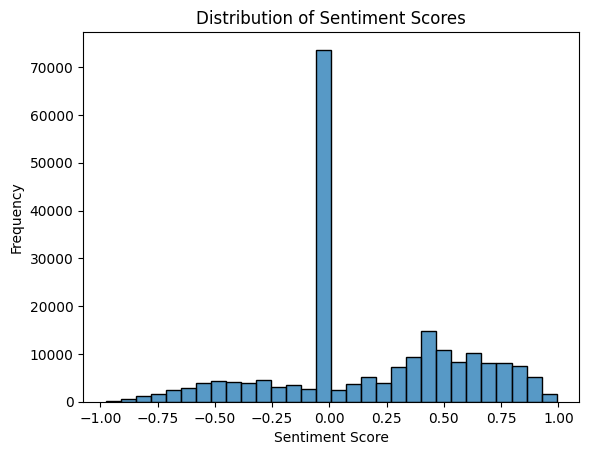

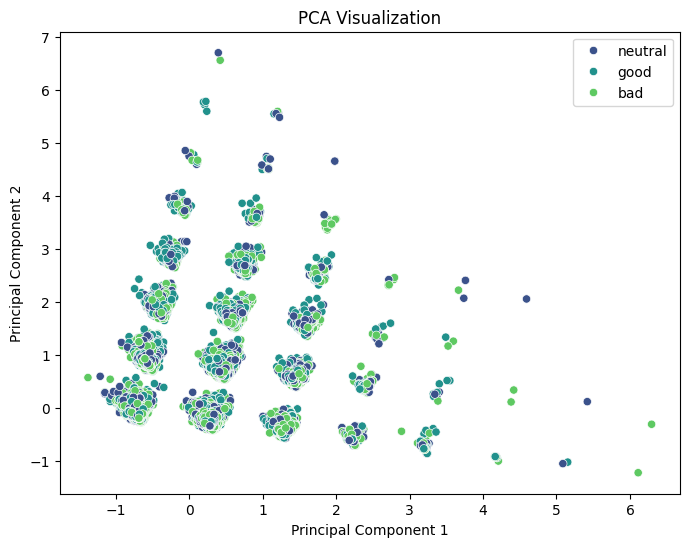

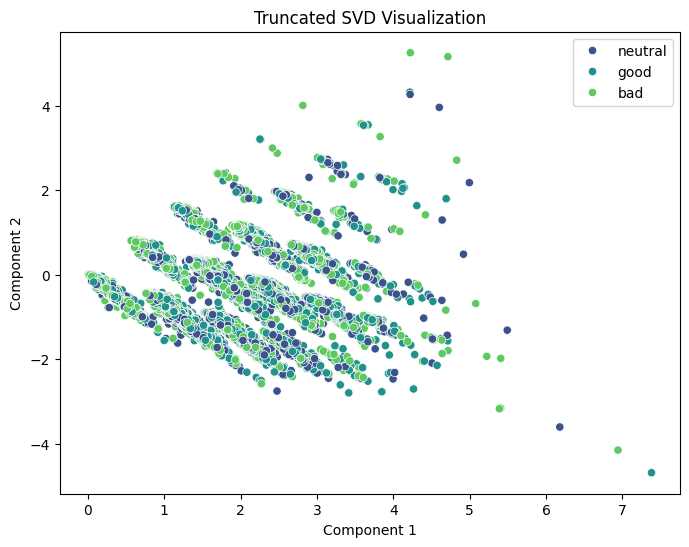

In [ ]:
# All necessary imports for visualization, analysis, and inputs
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud

# Load the CSV file
csv_data = pd.read_csv("file.csv")

# Converts CSV to a dataframe to show what the first few rows of the uploaded file look like in order to compare to NLTK analysis
print("First few rows of the dataframe:")
print(csv_data.head())

# Analyzing sentiment distribution
sentiment_distribution = csv_data['labels'].value_counts(normalize=True) * 100
print("\nSentiment Distribution:")
print(sentiment_distribution)

# Data Analysis
def analyze_data(data):
    # How long each of the tweets were
    data['conversation_length'] = data['tweets'].apply(lambda x: len(x.split()))

    # Analyze sentiment scores
    sia = SentimentIntensityAnalyzer()
    data['sentiment_scores'] = data['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Visualization of conversation lengths
    sns.histplot(data['conversation_length'], bins=30)
    plt.title('Distribution of Conversation Lengths')
    plt.xlabel('Length of Conversation')
    plt.ylabel('Frequency')
    plt.show()

    # Visualization of the sentiment scores of the tweets given by TF-IDF
    sns.histplot(data['sentiment_scores'], bins=30)
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()


# PCA done on data
def perform_pca(data):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(data['tweets'])

    # For two dimensional analysis
    pca = PCA(n_components=2)

    #Converted to array in order to put onto graph, because PCA doesn't support this
    X_pca = pca.fit_transform(X.toarray())

    # Plot PCA components
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['labels'], palette='viridis')
    plt.title('PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()


# SVD done on data
def perform_truncated_svd(data):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(data['tweets'])

    # For two dimensional analysis
    svd = TruncatedSVD(n_components=2)

    # SVD does support non-arrays
    X_svd = svd.fit_transform(X)

    # Plot SVD components
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=data['labels'], palette='viridis')
    plt.title('Truncated SVD Visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

# Run all of the functions
analyze_data(csv_data)
perform_pca(csv_data)
perform_truncated_svd(csv_data)
